# Image Metrics Example
Adapted from [SciKit-Image: Structural similarity index](http://scikit-image.org/docs/dev/auto_examples/plot_ssim.html).

**Note:**
*There seem to be some minor numerical instabilities on GPU.*

In [1]:
# Force matplotlib to use inline rendering
%matplotlib inline

import os
import sys

# add path to libraries for ipython
sys.path.append(os.path.expanduser("~/libs"))

import numpy as np
import tensorflow as tf
import tensorlight as light

from skimage import data, img_as_float
from scipy.misc import imresize

DATA_ROOT = "/work/sauterme/data"

### Demo using SINGLE images

In [4]:
image = data.camera()
img = img_as_float(image)
rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
noise[np.random.random(size=noise.shape) > 0.5] *= -1

# a) Noise
img_noise = img + noise
img_noise[img_noise > 1.0] = 1.0
img_noise[img_noise < 0.0] = 0.0

# b) Constant noise
img_const = img + abs(noise)
img_const[img_const > 1.0] = 1.0

# c) Scaled (center)
img_scaled = imresize(img, (rows, int(cols * 1.15)))
s = img_scaled.shape
border = (s[1] - s[0]) // 2
img_scaled = img_scaled[:, border:s[0]+border]
img_scaled = img_as_float(img_scaled)

# d) Scaled (left part)
img_scaled_left = imresize(img, (rows, int(cols * 1.1)))
img_scaled_left = img_scaled_left[:, 0:cols]
img_scaled_left = img_as_float(img_scaled_left)

# e) Gaussian light blur
img_blur1 = light.utils.image.gaussian_blur(img, sigma=1.0)

# f) Gaussian medium blur
img_blur2 = light.utils.image.gaussian_blur(img, sigma=2.5)

# g) Gaussian strong blur
img_blur3 = light.utils.image.gaussian_blur(img, sigma=5.0)

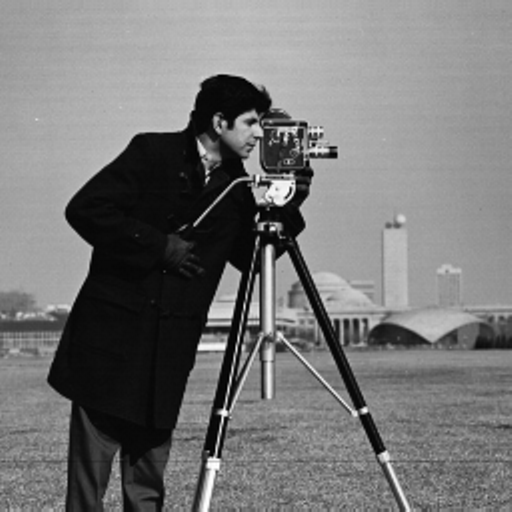

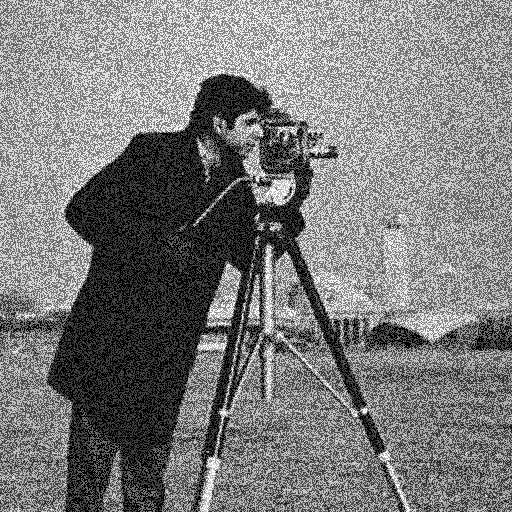

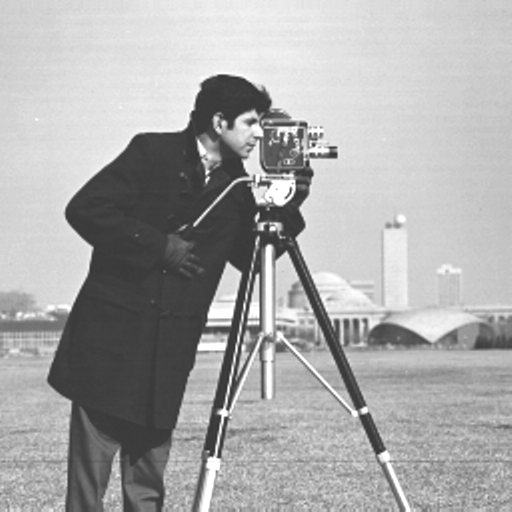

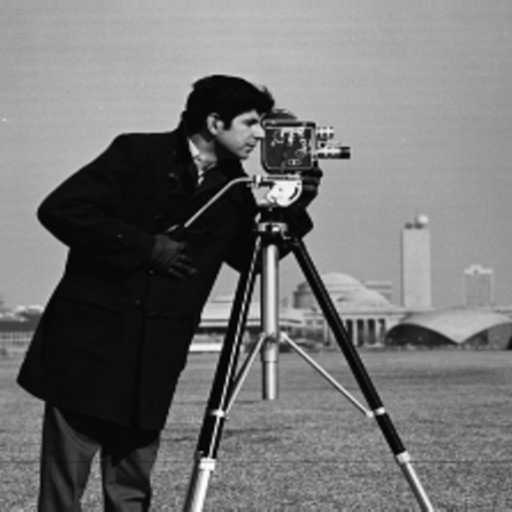

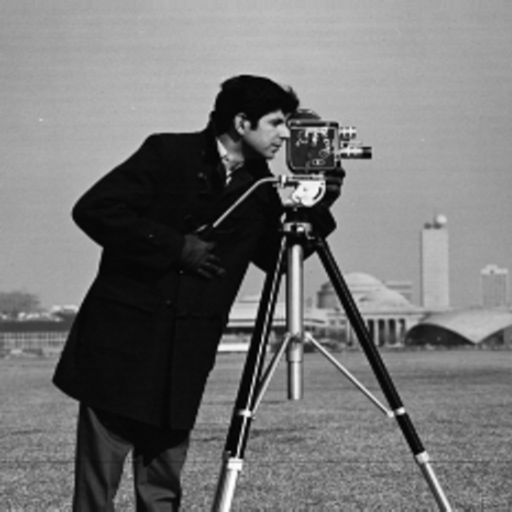

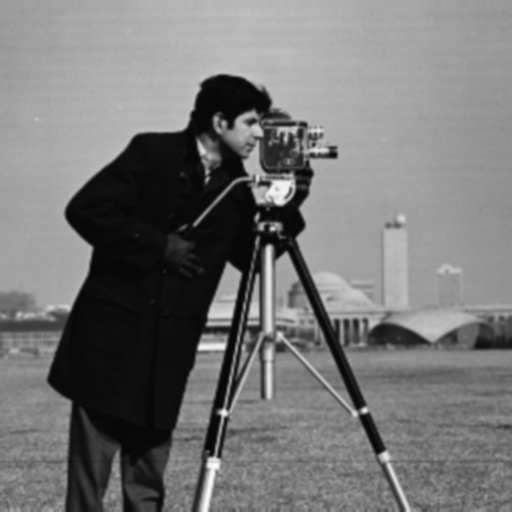

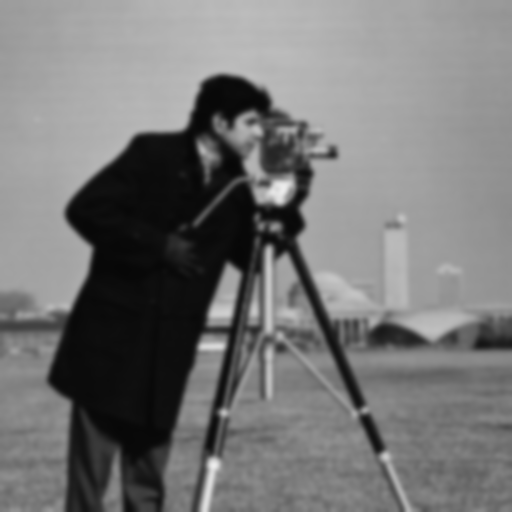

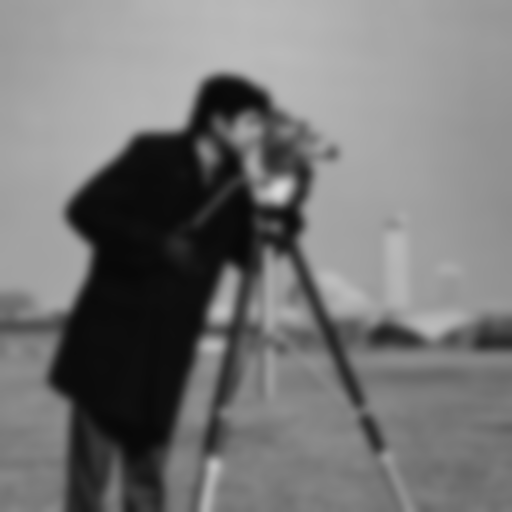

In [5]:
light.visualization.display_array(img)
light.visualization.display_array(img_noise)
light.visualization.display_array(img_const)
light.visualization.display_array(img_scaled)
light.visualization.display_array(img_scaled_left)
light.visualization.display_array(img_blur1)
light.visualization.display_array(img_blur2)
light.visualization.display_array(img_blur3)

In [10]:
image1 = tf.placeholder(tf.float32, shape=[rows, cols])
image2 = tf.placeholder(tf.float32, shape=[rows, cols])

def image_to_4d(image):
    image = tf.expand_dims(image, 0) # BATCH_SIZE = 1
    image = tf.expand_dims(image, -1) # CHANNELS = 1
    return image

image4d_1 = image_to_4d(image1)
image4d_2 = image_to_4d(image2)

# optional: resize:
image4d_1 = tf.image.resize_images(image4d_1, size=[32, 32])
image4d_2 = tf.image.resize_images(image4d_2, size=[32, 32])

ssim_index = light.loss.ssim(image4d_1, image4d_2)
msssim_index = light.loss.ms_ssim(image4d_1, image4d_2, patch_size=5, level_weights=[1/3.0, 1/3.0, 1/3.0])
ssssim_index = light.loss.ss_ssim(image4d_1, image4d_2)

mse = light.loss.mse(image4d_1, image4d_2)
rmse = light.loss.rmse(image4d_1, image4d_2)
mae = light.loss.mae(image4d_1, image4d_2)
rmae = light.loss.rmae(image4d_1, image4d_2)
bce = light.loss.bce(image4d_1, image4d_2)

gdl = light.loss.gdl(image4d_1, image4d_2)
mgdl = light.loss.mgdl(image4d_1, image4d_2)

psnr = light.image.psnr(image4d_1, image4d_2)
sdiff = light.image.sharp_diff(image4d_1, image4d_2)

light.hardware.set_cuda_devices([5])
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    
    mse_none = sess.run(mse,
                        feed_dict={image1: img, image2: img})
    mse_noise = sess.run(mse,
                         feed_dict={image1: img, image2: img_noise})
    mse_const = sess.run(mse,
                         feed_dict={image1: img, image2: img_const})
    mse_scaled = sess.run(mse,
                          feed_dict={image1: img, image2: img_scaled})
    mse_scaled_left = sess.run(mse,
                               feed_dict={image1: img, image2: img_scaled_left})
    mse_blur1 = sess.run(mse,
                         feed_dict={image1: img, image2: img_blur1})
    mse_blur2 = sess.run(mse,
                         feed_dict={image1: img, image2: img_blur2})
    mse_blur3 = sess.run(mse,
                         feed_dict={image1: img, image2: img_blur3})
    
    rmse_none = sess.run(rmse,
                         feed_dict={image1: img, image2: img})
    rmse_noise = sess.run(rmse,
                          feed_dict={image1: img, image2: img_noise})
    rmse_const = sess.run(rmse,
                          feed_dict={image1: img, image2: img_const})
    rmse_scaled = sess.run(rmse,
                           feed_dict={image1: img, image2: img_scaled})
    rmse_scaled_left = sess.run(rmse,
                                feed_dict={image1: img, image2: img_scaled_left})
    rmse_blur1 = sess.run(rmse,
                          feed_dict={image1: img, image2: img_blur1})
    rmse_blur2 = sess.run(rmse,
                          feed_dict={image1: img, image2: img_blur2})
    rmse_blur3 = sess.run(rmse,
                          feed_dict={image1: img, image2: img_blur3})
    
    mae_none = sess.run(mae,
                        feed_dict={image1: img, image2: img})
    mae_noise = sess.run(mae,
                         feed_dict={image1: img, image2: img_noise})
    mae_const = sess.run(mae,
                         feed_dict={image1: img, image2: img_const})
    mae_scaled = sess.run(mae,
                          feed_dict={image1: img, image2: img_scaled})
    mae_scaled_left = sess.run(mae,
                               feed_dict={image1: img, image2: img_scaled_left})
    mae_blur1 = sess.run(mae,
                         feed_dict={image1: img, image2: img_blur1})
    mae_blur2 = sess.run(mae,
                         feed_dict={image1: img, image2: img_blur2})
    mae_blur3 = sess.run(mae,
                         feed_dict={image1: img, image2: img_blur3})
    
    rmae_none = sess.run(rmae,
                         feed_dict={image1: img, image2: img})
    rmae_noise = sess.run(rmae,
                          feed_dict={image1: img, image2: img_noise})
    rmae_const = sess.run(rmae,
                          feed_dict={image1: img, image2: img_const})
    rmae_scaled = sess.run(rmae,
                           feed_dict={image1: img, image2: img_scaled})
    rmae_scaled_left = sess.run(rmae,
                                feed_dict={image1: img, image2: img_scaled_left})
    rmae_blur1 = sess.run(rmae,
                          feed_dict={image1: img, image2: img_blur1})
    rmae_blur2 = sess.run(rmae,
                          feed_dict={image1: img, image2: img_blur2})
    rmae_blur3 = sess.run(rmae,
                          feed_dict={image1: img, image2: img_blur3})
    
    bce_none = sess.run(rmae,
                        feed_dict={image1: img, image2: img})
    bce_noise = sess.run(rmae,
                         feed_dict={image1: img, image2: img_noise})
    bce_const = sess.run(rmae,
                         feed_dict={image1: img, image2: img_const})
    bce_scaled = sess.run(rmae,
                          feed_dict={image1: img, image2: img_scaled})
    bce_scaled_left = sess.run(rmae,
                               feed_dict={image1: img, image2: img_scaled_left})
    bce_blur1 = sess.run(rmae,
                         feed_dict={image1: img, image2: img_blur1})
    bce_blur2 = sess.run(rmae,
                         feed_dict={image1: img, image2: img_blur2})
    bce_blur3 = sess.run(rmae,
                         feed_dict={image1: img, image2: img_blur3})
    

    ssim_none = sess.run(ssim_index,
                         feed_dict={image1: img, image2: img})
    ssim_noise = sess.run(ssim_index,
                          feed_dict={image1: img, image2: img_noise})
    ssim_const = sess.run(ssim_index,
                          feed_dict={image1: img, image2: img_const})
    ssim_scaled = sess.run(ssim_index,
                           feed_dict={image1: img, image2: img_scaled})
    ssim_scaled_left = sess.run(ssim_index,
                                feed_dict={image1: img, image2: img_scaled_left})
    ssim_blur1 = sess.run(ssim_index,
                          feed_dict={image1: img, image2: img_blur1})
    ssim_blur2 = sess.run(ssim_index,
                          feed_dict={image1: img, image2: img_blur2})
    ssim_blur3 = sess.run(ssim_index,
                          feed_dict={image1: img, image2: img_blur3})

    msssim_none = sess.run(msssim_index,
                           feed_dict={image1: img, image2: img})
    msssim_noise = sess.run(msssim_index,
                            feed_dict={image1: img, image2: img_noise})
    msssim_const = sess.run(msssim_index,
                            feed_dict={image1: img, image2: img_const})
    msssim_scaled = sess.run(msssim_index,
                             feed_dict={image1: img, image2: img_scaled})
    msssim_scaled_left = sess.run(msssim_index,
                                  feed_dict={image1: img, image2: img_scaled_left})
    msssim_blur1 = sess.run(msssim_index,
                            feed_dict={image1: img, image2: img_blur1})
    msssim_blur2 = sess.run(msssim_index,
                            feed_dict={image1: img, image2: img_blur2})
    msssim_blur3 = sess.run(msssim_index,
                            feed_dict={image1: img, image2: img_blur3})
    
    ssssim_none = sess.run(ssssim_index,
                           feed_dict={image1: img, image2: img})
    ssssim_noise = sess.run(ssssim_index,
                            feed_dict={image1: img, image2: img_noise})
    ssssim_const = sess.run(ssssim_index,
                            feed_dict={image1: img, image2: img_const})
    ssssim_scaled = sess.run(ssssim_index,
                             feed_dict={image1: img, image2: img_scaled})
    ssssim_scaled_left = sess.run(ssssim_index,
                                  feed_dict={image1: img, image2: img_scaled_left})
    ssssim_blur1 = sess.run(ssssim_index,
                            feed_dict={image1: img, image2: img_blur1})
    ssssim_blur2 = sess.run(ssssim_index,
                            feed_dict={image1: img, image2: img_blur2})
    ssssim_blur3 = sess.run(ssssim_index,
                            feed_dict={image1: img, image2: img_blur3})
    
    gdl_none = sess.run(gdl,
                        feed_dict={image1: img, image2: img})
    gdl_noise = sess.run(gdl,
                         feed_dict={image1: img, image2: img_noise})
    gdl_const = sess.run(gdl,
                         feed_dict={image1: img, image2: img_const})
    gdl_scaled = sess.run(gdl,
                          feed_dict={image1: img, image2: img_scaled})
    gdl_scaled_left = sess.run(gdl,
                               feed_dict={image1: img, image2: img_scaled_left})
    gdl_blur1 = sess.run(gdl,
                         feed_dict={image1: img, image2: img_blur1})
    gdl_blur2 = sess.run(gdl,
                         feed_dict={image1: img, image2: img_blur2})
    gdl_blur3 = sess.run(gdl,
                         feed_dict={image1: img, image2: img_blur3})
    
    mgdl_none = sess.run(mgdl,
                         feed_dict={image1: img, image2: img})
    mgdl_noise = sess.run(mgdl,
                          feed_dict={image1: img, image2: img_noise})
    mgdl_const = sess.run(mgdl,
                          feed_dict={image1: img, image2: img_const})
    mgdl_scaled = sess.run(mgdl,
                           feed_dict={image1: img, image2: img_scaled})
    mgdl_scaled_left = sess.run(mgdl,
                                feed_dict={image1: img, image2: img_scaled_left})
    mgdl_blur1 = sess.run(mgdl,
                          feed_dict={image1: img, image2: img_blur1})
    mgdl_blur2 = sess.run(mgdl,
                          feed_dict={image1: img, image2: img_blur2})
    mgdl_blur3 = sess.run(mgdl,
                          feed_dict={image1: img, image2: img_blur3})
    
    psnr_none = sess.run(psnr,
                         feed_dict={image1: img, image2: img})
    psnr_noise = sess.run(psnr,
                          feed_dict={image1: img, image2: img_noise})
    psnr_const = sess.run(psnr,
                          feed_dict={image1: img, image2: img_const})
    psnr_scaled = sess.run(psnr,
                           feed_dict={image1: img, image2: img_scaled})
    psnr_scaled_left = sess.run(psnr,
                                feed_dict={image1: img, image2: img_scaled_left})
    psnr_blur1 = sess.run(psnr,
                          feed_dict={image1: img, image2: img_blur1})
    psnr_blur2 = sess.run(psnr,
                          feed_dict={image1: img, image2: img_blur2})
    psnr_blur3 = sess.run(psnr,
                          feed_dict={image1: img, image2: img_blur3})
    
    sdiff_none = sess.run(sdiff,
                          feed_dict={image1: img, image2: img})
    sdiff_noise = sess.run(sdiff,
                           feed_dict={image1: img, image2: img_noise})
    sdiff_const = sess.run(sdiff,
                           feed_dict={image1: img, image2: img_const})
    sdiff_scaled = sess.run(sdiff,
                            feed_dict={image1: img, image2: img_scaled})
    sdiff_scaled_left = sess.run(sdiff,
                                 feed_dict={image1: img, image2: img_scaled_left})
    sdiff_blur1 = sess.run(sdiff,
                           feed_dict={image1: img, image2: img_blur1})
    sdiff_blur2 = sess.run(sdiff,
                           feed_dict={image1: img, image2: img_blur2})
    sdiff_blur3 = sess.run(sdiff,
                           feed_dict={image1: img, image2: img_blur3})

    
def print_result(title, mse, rmse, mae, rmae, bce, ssim, msssim, ssssim, gdl, mgdl, psnr, sdiff):
    print('### {}:'.format(title))
    print('MSE: {}'.format(mse))
    print('RMSE: {}'.format(rmse))
    print('MAE: {}'.format(mae))
    print('RMAE: {}'.format(rmae))
    print('BCE: {}'.format(bce))
    print('SSIM: {}'.format(ssim))
    print('SS-SSIM: {}'.format(ssssim))
    print('MS-SSIM: {}'.format(msssim))
    print('GDL: {}'.format(gdl))
    print('MGDL: {}'.format(mgdl))
    print('PSNR: {}'.format(psnr))
    print('SHARP DIFF: {}'.format(sdiff))
    print
    
print_result('None',
             mse_none, rmse_none, mae_none, rmae_none, bce_none,
             ssim_none, msssim_none, ssssim_none,
             gdl_none, mgdl_none, psnr_none, sdiff_none)
print_result('Noise',
             mse_noise, rmse_noise, mae_noise, rmae_noise, bce_noise,
             ssim_noise, msssim_noise, ssssim_noise,
             gdl_noise, mgdl_noise, psnr_noise, sdiff_noise)
print_result('Constant noise',
             mse_const, rmse_const, mae_const, rmae_const, bce_const,
             ssim_const, msssim_const, ssssim_const,
             gdl_const, mgdl_const, psnr_const, sdiff_const)
print_result('Scaled (center)',
             mse_scaled, rmse_scaled, mae_scaled, rmae_scaled, bce_scaled,
             ssim_scaled, msssim_scaled, ssssim_scaled,
             gdl_scaled, mgdl_scaled, psnr_scaled, sdiff_scaled)
print_result('Scaled (left)',
             mse_scaled_left, rmse_scaled_left, mae_scaled_left, rmae_scaled_left, bce_scaled_left,
             ssim_scaled_left, msssim_scaled_left, ssssim_scaled_left,
             gdl_scaled_left, mgdl_scaled_left, psnr_scaled_left, sdiff_scaled_left)
print_result('Blur (low)',
             mse_blur1, rmse_blur1, mae_blur1, rmae_blur1, bce_blur1,
             ssim_blur1, msssim_blur1, ssssim_blur1,
             gdl_blur1, mgdl_blur1, psnr_blur1, sdiff_blur1)
print_result('Blur (medium)',
             mse_blur2, rmse_blur2, mae_blur2, rmae_blur2, bce_blur2,
             ssim_blur2, msssim_blur2, ssssim_blur2,
             gdl_blur2, mgdl_blur2, psnr_blur2, sdiff_blur2)
print_result('Blur (high)',
             mse_blur3, rmse_blur3, mae_blur3, rmae_blur3, bce_blur3,
             ssim_blur3, msssim_blur3, ssssim_blur3,
             gdl_blur3, mgdl_blur3, psnr_blur3, sdiff_blur3)

### None:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
RMAE: 0.0
BCE: 0.0
SSIM: 0.0
SS-SSIM: 0.0
MS-SSIM: 0.0
GDL: 0.0
MGDL: 0.0
PSNR: 99.0
SHARP DIFF: 99.0

### Noise:
MSE: 0.0357449650764
RMSE: 0.18906340003
MAE: 0.183080583811
RMAE: 0.427879184484
BCE: 0.427879184484
SSIM: 0.447037935257
SS-SSIM: 0.170065283775
MS-SSIM: 0.351943790913
GDL: 345.733337402
MGDL: 0.337630212307
PSNR: 14.4678506851
SHARP DIFF: 4.99481630325

### Constant noise:
MSE: 0.0398528501391
RMSE: 0.199631780386
MAE: 0.199402570724
RMAE: 0.446545153856
BCE: 0.446545153856
SSIM: 0.152715206146
SS-SSIM: 0.130687296391
MS-SSIM: 0.0584245920181
GDL: 14.5725622177
MGDL: 0.0142310187221
PSNR: 13.9954051971
SHARP DIFF: 18.5885162354

### Scaled (center):
MSE: 0.0254860986024
RMSE: 0.159643650055
MAE: 0.0770105645061
RMAE: 0.277507781982
BCE: 0.277507781982
SSIM: 0.452841997147
SS-SSIM: 0.135738134384
MS-SSIM: 0.282741546631
GDL: 165.803924561
MGDL: 0.161917895079
PSNR: 15.9369659424
SHARP DIFF: 8.7531080246

### Scaled (left):
MSE: 0.036

## Test using BATCHES of images (MNIST)

In [ ]:
BATCH_SIZE = 4
FRAME_SIZE = 64
FRAME_CHANNELS = 1

dataset_train = light.datasets.moving_mnist.MovingMNISTTrainDataset(DATA_ROOT, input_shape=[1,64,64,1])

image1 = tf.placeholder(tf.float32, shape=[None, FRAME_SIZE, FRAME_SIZE, FRAME_CHANNELS])
image2 = tf.placeholder(tf.float32, shape=[None, FRAME_SIZE, FRAME_SIZE, FRAME_CHANNELS])

ssim_loss = light.loss.ssim(image1, image2)

# when len(levels_weights) >= 3 and patch_size = 7:
# ==> can produce NaN here, because a 64x64 image is too small
msssim_loss = light.loss.ms_ssim(image1, image2, patch_size=7, level_weights=[0.2, 0.4, 0.4])

ssssim_loss = light.loss.ss_ssim(image1, image2, level=2)

rmse_loss = light.loss.rmse(image1, image2)

gdl_value = light.loss.gdl(image1, image2)
mgdl_value = light.loss.mgdl(image1, image2)

psnr_value = light.image.psnr(image1, image2, max_value=255.0)
sdiff_value = light.image.sharp_diff(image1, image2, max_value=255.0)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())
    
    def get_batch_without_time_dim():
        dataset_train.reset()
        b_x, _ = dataset_train.get_batch(BATCH_SIZE)
        b_x = np.squeeze(b_x, (1,))
        return b_x
        
    batch = get_batch_without_time_dim()
    batch_rescaled = batch * 255 # because (MS-)SSIM expects scale [0-255]
    
    ssim = sess.run(ssim_loss,
                    feed_dict={image1: batch_rescaled, image2: batch_rescaled})
    msssim = sess.run(msssim_loss,
                       feed_dict={image1: batch_rescaled, image2: batch_rescaled})
    ssssim = sess.run(ssssim_loss,
                       feed_dict={image1: batch_rescaled, image2: batch_rescaled})
    rmse = sess.run(rmse_loss,
                    feed_dict={image1: batch, image2: batch})
    
    gdl = sess.run(gdl_value,
                   feed_dict={image1: batch_rescaled, image2: batch_rescaled})
    mgdl = sess.run(mgdl_value,
                    feed_dict={image1: batch_rescaled, image2: batch_rescaled})
    
    psnr = sess.run(psnr_value,
                    feed_dict={image1: batch_rescaled, image2: batch_rescaled})
    sdiff = sess.run(sdiff_value,
                    feed_dict={image1: batch_rescaled, image2: batch_rescaled})
    
    print "### Same image:"
    print('RMSE: {}'.format(rmse))
    print('SSIM: {}'.format(ssim))
    print('SS-SSIM: {}'.format(ssssim))
    print('MS-SSIM: {}'.format(msssim))
    print('GDL: {}'.format(gdl))
    print('MGDL: {}'.format(mgdl))
    print('PSNR: {}'.format(psnr))
    print('SHARP-DIFF: {}'.format(sdiff))
    
    batch_a = get_batch_without_time_dim()
    batch_b = get_batch_without_time_dim()
    batch_a_rescaled = batch_a 
    batch_b_rescaled = batch_b
    
    light.visualization.display_batch(batch_a_rescaled)
    light.visualization.display_batch(batch_b_rescaled)
    
    ssim = sess.run(ssim_loss,
                    feed_dict={image1: batch_a_rescaled, image2: batch_b_rescaled})
    msssim = sess.run(msssim_loss,
                      feed_dict={image1: batch_a_rescaled, image2: batch_b_rescaled})
    ssssim = sess.run(ssssim_loss,
                      feed_dict={image1: batch_a_rescaled, image2: batch_b_rescaled})
    rmse = sess.run(rmse_loss,
                    feed_dict={image1: batch_a, image2: batch_b})
    
    gdl = sess.run(gdl_value,
                   feed_dict={image1: batch_a_rescaled, image2: batch_b_rescaled})
    mgdl = sess.run(mgdl_value,
                    feed_dict={image1: batch_a_rescaled, image2: batch_b_rescaled})
    
    psnr = sess.run(psnr_value,
                    feed_dict={image1: batch_a_rescaled, image2: batch_b_rescaled})
    sdiff = sess.run(sdiff_value,
                    feed_dict={image1: batch_a_rescaled, image2: batch_b_rescaled})

    
    print "### Different images:"
    print('RMSE: {}'.format(rmse))
    print('SSIM: {}'.format(ssim))
    print('SS-SSIM: {}'.format(ssssim))
    print('MS-SSIM: {}'.format(msssim))
    print('GDL: {}'.format(gdl))
    print('MGDL: {}'.format(mgdl))
    print('PSNR: {}'.format(psnr))
    print('SHARP-DIFF: {}'.format(sdiff))

## Compare results on RGB and gray-scale images

Remarks: Some metrics to not support color-images, such as SSIM. But variants like CSSIM exist.

In [ ]:
image1 = tf.placeholder(tf.float32, shape=[None, 250, 250, 3])
image2 = tf.placeholder(tf.float32, shape=[None, 250, 250, 3])

gray_image1 = tf.image.rgb_to_grayscale(image1)
gray_image2 = tf.image.rgb_to_grayscale(image2)

mse_color = light.loss.mse(image1, image2)
mse_gray = light.loss.mse(gray_image1, gray_image2)

#ssim_color = light.image.ssim(image1, image2, L=1.0)
ssim_gray = light.image.ssim(gray_image1, gray_image2, L=1.0)

#msssim_color = light.image.msssim(image1, image2, L=1.0)
msssim_gray = light.image.ms_ssim(gray_image1, gray_image2, L=1.0)

mgdl_color = light.loss.mgdl(image1, image2)
mgdl_gray = light.loss.mgdl(gray_image1, gray_image2)

psnr_color = light.image.psnr(image1, image2, max_value=1.0)
psnr_gray = light.image.psnr(gray_image1, gray_image2, max_value=1.0)

sdiff_color = light.image.sharp_diff(image1, image2, max_value=1.0)
sdiff_gray = light.image.sharp_diff(gray_image1, gray_image2, max_value=1.0)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config) as sess:
    sess.run(tf.initialize_all_variables())
    
    # reads image as uint8
    rgb = light.utils.image.read("assets/example250x250.png")
    #rgb_blur = gaussian_filter(rgb, sigma=2.5) # this blur filter makes the image gray, but with shape [..., 3]
    rgb_blur = light.utils.image.gaussian_blur(rgb, 2.0)
    
    # cast to scale [0, 1] as float32
    rgb = rgb / 255.0
    rgb_blur = rgb_blur / 255.0 
    
    # batch-size=1
    rgb = np.expand_dims(rgb, 0)
    rgb_blur = np.expand_dims(rgb_blur, 0)
    
    gray, gray_blur = sess.run([gray_image1, gray_image2], feed_dict={image1: rgb, image2: rgb_blur})
    
    msec, mseg = sess.run([mse_color, mse_gray], feed_dict={image1: rgb, image2: rgb_blur})
    
    ssimg = sess.run(ssim_gray, feed_dict={image1: rgb, image2: rgb_blur})
    ssimc = None
    
    msssimg = sess.run(msssim_gray, feed_dict={image1: rgb, image2: rgb_blur})
    msssimc = None
    
    mgdlc, mgdlg = sess.run([mgdl_color, mgdl_gray], feed_dict={image1: rgb, image2: rgb_blur})
    
    psnrc, psnrg = sess.run([psnr_color, psnr_gray], feed_dict={image1: rgb, image2: rgb_blur})
    
    sdiffc, sdiffg = sess.run([sdiff_color, sdiff_gray], feed_dict={image1: rgb, image2: rgb_blur})
    
    
print(rgb.shape)
print(rgb_blur.shape)
print(gray.shape)
print(gray_blur.shape)
    
light.visualization.display_array(rgb[0])
light.visualization.display_array(rgb_blur[0])
light.visualization.display_array(gray[0])
light.visualization.display_array(gray_blur[0])

def print_result(title, mse, ssim, msssim, mgdl, psnr, sdiff):
    print('### {} ###'.format(title))
    print('MSE: {}'.format(mse))
    print('SSIM: {}'.format(ssim))
    print('MS-SSIM: {}'.format(msssim))
    print('MGDL: {}'.format(mgdl))
    print('PSNR: {}'.format(psnr))
    print('SHARP DIFF: {}'.format(sdiff))
    print

print_result("Gray", mseg, ssimg, msssimg, mgdlg, psnrg, sdiffg)
print_result("Color", msec, ssimc, msssimc, mgdlc, psnrc, sdiffc)